<a href="https://colab.research.google.com/github/SAB-DataAnalysis/JustIT-Exercises/blob/main/Python_Input_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 1 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Territory   223 non-null    object
 1   UN_Region           223 non-null    object
 2   IMF_Estimate        223 non-null    int64 
 3   IMF_Year            223 non-null    int64 
 4   WorldBank_Estimate  223 non-null    int64 
 5   WorldBank_Year      223 non-null    int64 
 6   UN_Estimate         223 non-null    int64 
 7   UN_Year             223 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.7+ KB
None
  Country/Territory UN_Region  IMF_Estimate  IMF_Year  WorldBank_Estimate  \
1            Monaco    Europe             0         0              234316   
2     Liechtenstein    Europe             0         0              157755   
3        Luxembourg    Europe        132372      2023              133590   
4           Ireland    Europe        114581      2023    

<ipython-input-1-1bb6ea68b3e1>:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IMF_Estimate'].fillna(df['avg_worldbank_un'], inplace=True)


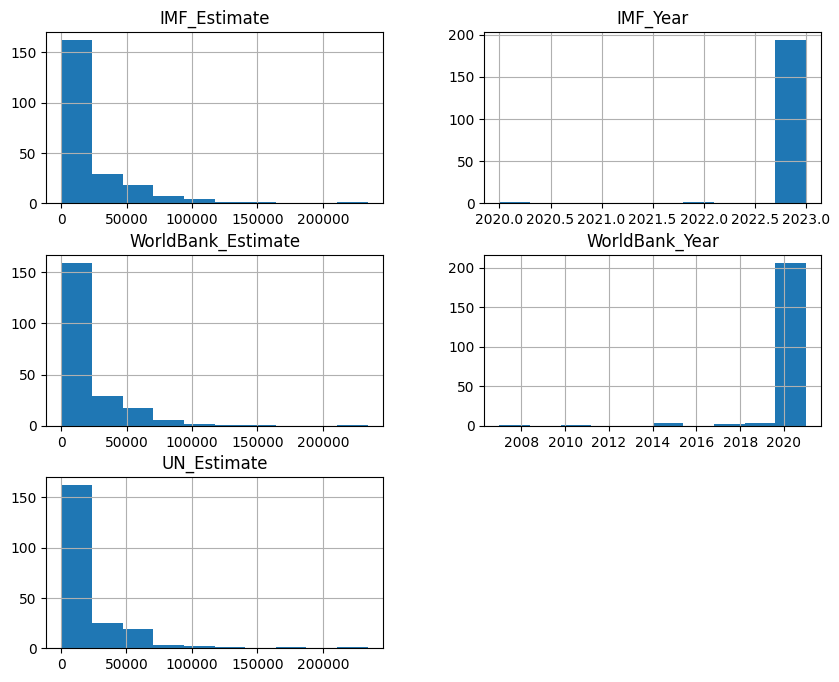

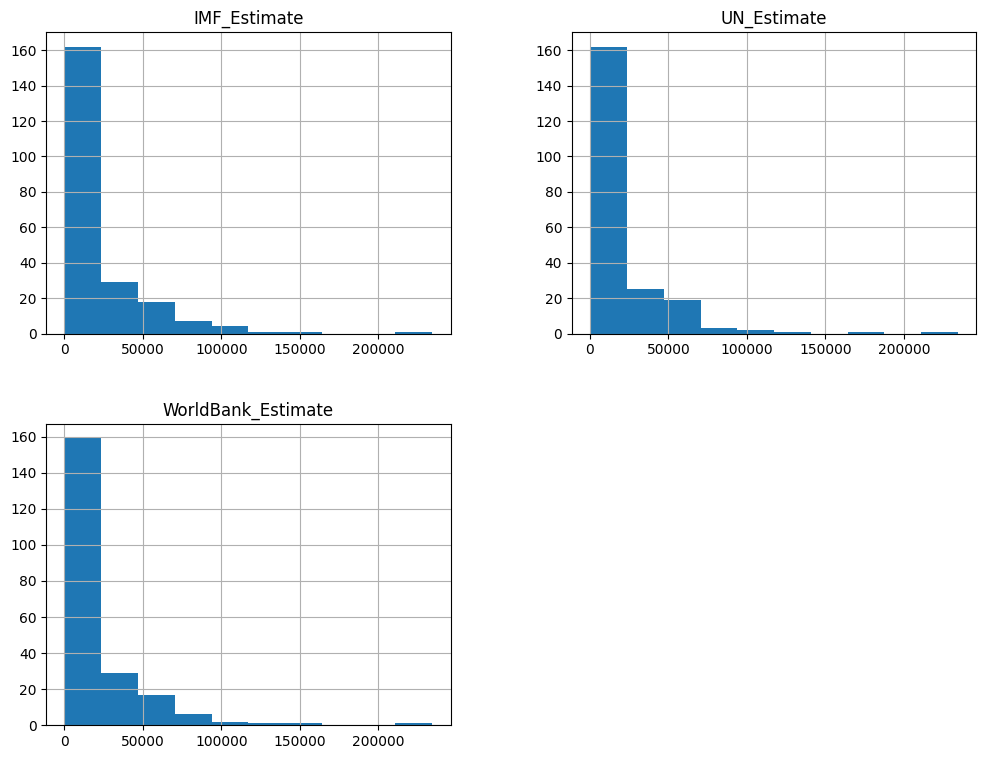

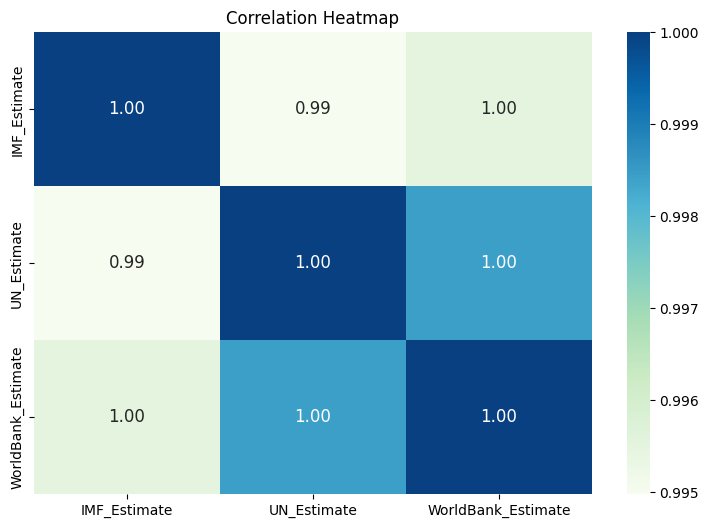

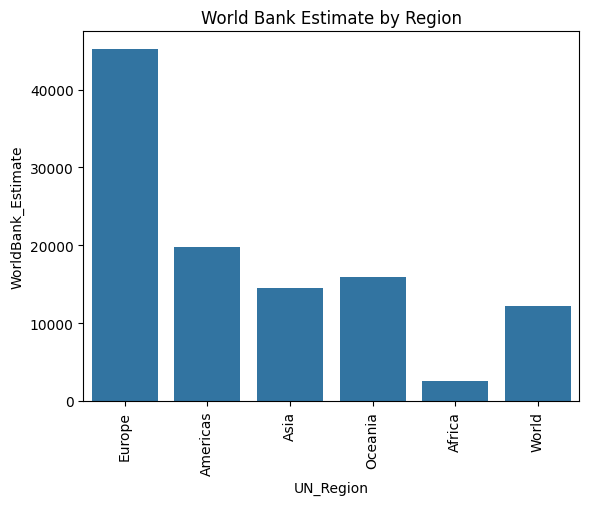

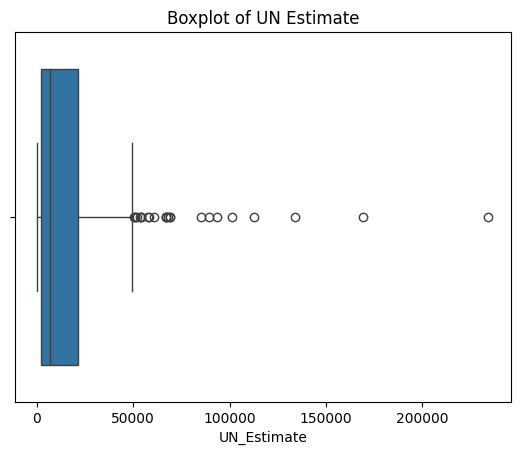

Filtered dataset shape: (190, 8)


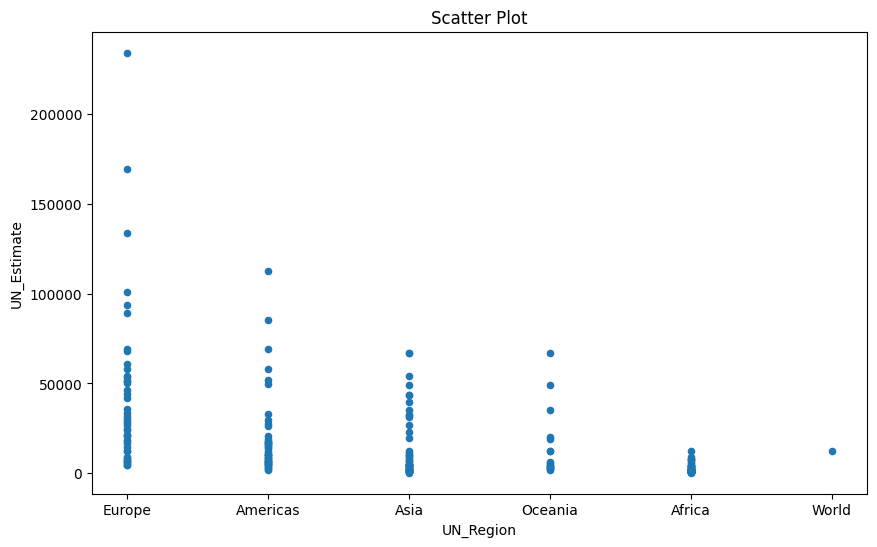

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

print(df.info())
print(df.head())

# Number of countries per region

countries_per_region = df['UN_Region'].value_counts()
print("Number of countries per region:")
print(countries_per_region)


# What is "European Union [n 1]
print("Details about 'European Union [n 1]':")
print(df[df['Country/Territory'] == 'European Union [n 1]'])


# Countries in Europe below the average GDP
europe_data = df[df['UN_Region'] == 'Europe']
average_gdp = europe_data['WorldBank_Estimate'].mean()
below_average = europe_data[europe_data['WorldBank_Estimate'] < average_gdp]
print("Countries in Europe below the average GDP:")
print(below_average[['Country/Territory', 'WorldBank_Estimate']])


# Countries in Europe with a higher GDP than the UK
uk_gdp = df.loc[df['Country/Territory'] == 'United Kingdom', 'WorldBank_Estimate'].values[0]
higher_than_uk = europe_data[europe_data['WorldBank_Estimate'] > uk_gdp]
print("Countries in Europe with higher GDP than the UK:")
print(higher_than_uk[['Country/Territory', 'WorldBank_Estimate']])


# Countries below average by IMF world estimate
global_average = df['IMF_Estimate'].mean()
below_average_imf = df[df['IMF_Estimate'] < global_average]
print("Countries below average by IMF world estimate:")
print(below_average_imf[['Country/Territory', 'IMF_Estimate']])


# Highest estimates
highest_un = df[df['UN_Estimate'] == df['UN_Estimate'].max()]
highest_imf = df[df['IMF_Estimate'] == df['IMF_Estimate'].max()]
print("Country with highest UN Estimate:", highest_un['Country/Territory'].values[0])
print("Country with highest IMF Estimate:", highest_imf['Country/Territory'].values[0])


# Highest estimates
highest_un = df[df['UN_Estimate'] == df['UN_Estimate'].max()]
highest_imf = df[df['IMF_Estimate'] == df['IMF_Estimate'].max()]
print("Country with highest UN Estimate:", highest_un['Country/Territory'].values[0])
print("Country with highest IMF Estimate:", highest_imf['Country/Territory'].values[0])


# Replace 0 with NaN
df.replace(0, np.nan, inplace=True)

# Calculate average of WorldBank and UN estimates
df['avg_worldbank_un'] = df[['WorldBank_Estimate', 'UN_Estimate']].mean(axis=1)

# Fill null values in 'IMF_Estimate' with the calculated average
df['IMF_Estimate'].fillna(df['avg_worldbank_un'], inplace=True)

# Drop temporary column if not needed
df.drop(columns=['avg_worldbank_un'], inplace=True)

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())



## VISUALATION
## Histogram

# General histograms
df.hist(figsize=(10, 8))
plt.show()

# Specific columns
df[['IMF_Estimate', 'UN_Estimate', 'WorldBank_Estimate']].hist(figsize=(12, 9), bins=10)
plt.show()


## Correlation Heatmaps
corr = df[['IMF_Estimate', 'UN_Estimate', 'WorldBank_Estimate']].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='GnBu', fmt='.2f', annot_kws={'size': 12})
plt.title("Correlation Heatmap")
plt.show()


## Bar Plot
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title("World Bank Estimate by Region")
plt.show()


## Box Plot
sns.boxplot(x=df['UN_Estimate'])
plt.title("Boxplot of UN Estimate")
plt.show()


## Outlier Detection

# Calculate IQR
lower_q = df['UN_Estimate'].quantile(0.25)
upper_q = df['UN_Estimate'].quantile(0.75)
iqr = upper_q - lower_q

# Define boundaries
upper_boundary = upper_q + 1.5 * iqr
lower_boundary = lower_q - 1.5 * iqr

# Filter data
df_filtered = df[(df['UN_Estimate'] > lower_boundary) & (df['UN_Estimate'] < upper_boundary)]
print("Filtered dataset shape:", df_filtered.shape)


## Scatter Plot
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter', figsize=(10, 6), title="Scatter Plot")
plt.show()


##
